In [13]:
import cv2
import keras
import imutils
import numpy as np
import pandas as pd
from keras import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from keras.models import Sequential
from keras.optimizers import Adam, SGD
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense, ZeroPadding2D, BatchNormalization

In [14]:
x = np.load('/content/drive/My Drive/LICT training/Mosfiqun Nahid Hassan/Preprocessing_Data( Jupyter)/Numta64allx.npy')/255.0
y = np.load('/content/drive/My Drive/LICT training/Mosfiqun Nahid Hassan/Preprocessing_Data( Jupyter)/Numta64ally.npy')

In [15]:
x.shape

(72045, 64, 64)

In [16]:
x = x.reshape(-1,64,64,1)
y = to_categorical(y)

In [17]:
x.shape

(72045, 64, 64, 1)

In [18]:
y.shape

(72045, 10)

In [19]:
model = Sequential()

model.add(Conv2D(64, (3, 3),padding='same', activation='relu', input_shape=(64, 64,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128,(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256,(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(512,(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(512,(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(10, activation='softmax'))
adam = Adam(lr=.0001)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 64, 64, 64)        640       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 256)       295168    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 512)        

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [22]:
datagen = ImageDataGenerator(rotation_range=5, width_shift_range=0.2, height_shift_range=0.2,  zoom_range=0.2)
datagen.fit(X_train)

In [23]:
history = model.fit(datagen.flow(X_train, y_train,batch_size=100),validation_data=(X_test, y_test),epochs=10)

Epoch 1/10
649/649 [==============================] - 72s 111ms/step - loss: 0.7215 - accuracy: 0.7344 - val_loss: 0.1097 - val_accuracy: 0.9671
Epoch 2/10
649/649 [==============================] - 64s 99ms/step - loss: 0.1369 - accuracy: 0.9574 - val_loss: 0.0756 - val_accuracy: 0.9771
Epoch 3/10
649/649 [==============================] - 64s 99ms/step - loss: 0.1026 - accuracy: 0.9680 - val_loss: 0.0699 - val_accuracy: 0.9814
Epoch 4/10
649/649 [==============================] - 64s 99ms/step - loss: 0.0830 - accuracy: 0.9741 - val_loss: 0.0666 - val_accuracy: 0.9833
Epoch 5/10
649/649 [==============================] - 64s 98ms/step - loss: 0.0763 - accuracy: 0.9770 - val_loss: 0.0547 - val_accuracy: 0.9861
Epoch 6/10
649/649 [==============================] - 64s 98ms/step - loss: 0.0730 - accuracy: 0.9773 - val_loss: 0.0590 - val_accuracy: 0.9850
Epoch 7/10
649/649 [==============================] - 64s 98ms/step - loss: 0.0648 - accuracy: 0.9799 - val_loss: 0.0528 - val_accuracy

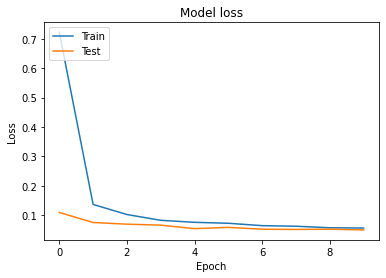

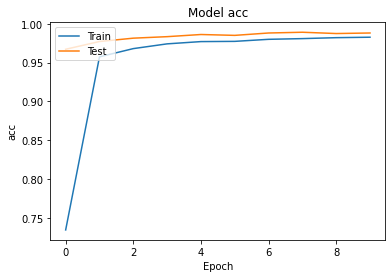

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model acc')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [25]:
model.save_weights('OCR_val_accuracy_9885.h5')

In [26]:
model.save('OCR_Model.h5')

In [27]:
all_img = []
for i in range(1,10):
  img1 = cv2.imread(str(i)+'.PNG',0)
  (thresh, im_bw) = cv2.threshold(img1, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
  inv = cv2.bitwise_not(im_bw)
  all_img.append(cv2.resize(inv, (64,64)))

In [28]:
all_img = np.array(all_img)

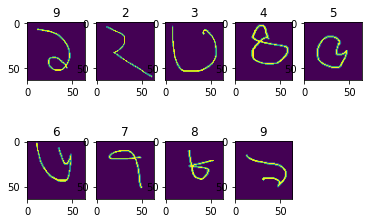

In [29]:
for i in range(1,10):
  plt.subplot(2,5,i)
  plt.imshow(all_img[i-1])
  plt.title(np.argmax(model.predict(np.reshape(all_img[i-1],(-1,64,64,1)))))

In [30]:
def segment(image, height=64):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (7, 7), 0)

    # threshold the image
    ret,thresh1 = cv2.threshold(gray ,100,255,cv2.THRESH_BINARY_INV)

    # dilate the white portions
    dilate = cv2.dilate(thresh1, None, iterations=2)

    # find contours in the image
    cnts = cv2.findContours(dilate.copy(), cv2.RETR_EXTERNAL,
        cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[1] if imutils.is_cv2() else cnts[0]

    orig = image.copy()
    i = 0
    t = 0
    c=0
    x_all = []
    w_all = []
    lines = []
    parts = []

    for cnt in cnts:
        # Check the area of contour, if it is very small ignore it
        if(cv2.contourArea(cnt) < 100):
            continue

        # Filtered countours are detected
        x,y,w,h = cv2.boundingRect(cnt)
        x_all.append(x)
        w_all.append(w)
        i = i + 1 

    comb = np.zeros((2,len(x_all)))
    comb[0,:]=x_all
    comb[1,:]=w_all
    comb = comb.T
    comb = comb[comb[:,0].argsort()]

    x_all = comb[:,0]
    w_all = comb[:,1]


    for i, item in enumerate (x_all):
        if i < len(x_all)-1:
            lines.append((item+w_all[i]+x_all[i+1])/2)


    for i in range(len(lines)):
        parts.append(cv2.resize(image
                                [:,t:int(lines[i]),:],(height,height)))
        t = int(lines[i])
        if i == len(lines)-1:
            parts.append(cv2.resize(image[:,t:,:],(height,height)))
    
    return parts

In [34]:
img=cv2.imread('135.PNG')
img1=segment(img)
i=np.array(img1)
i.shape

(3, 64, 64, 3)

In [35]:
all_img = []

for j in range (len(i)):
  img2=rgb2gray(i[j])
  all_img.append(img2)

Text(0.5, 1.0, '135')

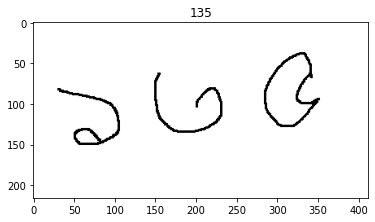

In [36]:
result=[]
for j in range(len(i)):
  result.append(np.argmax(model.predict(np.reshape(all_img[j],(-1,64,64,1)))))
sum=""
for j in range(len(i)):
   sum=sum+str(result[j])
plt.imshow(img)
plt.title(sum)